In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('loan_detection.csv')
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [5]:
df.shape

(41188, 60)

In [6]:
df.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [8]:
df['Loan_Status_label'].value_counts()

Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64

In [9]:
print(round(len(df [df['Loan_Status_label']==0])/ len(df) , 2))
print(round(len(df[df['Loan_Status_label']==1])/ len(df) , 2))

0.89
0.11


In [10]:
df.nunique()

age                              78
campaign                         42
pdays                            27
previous                          8
no_previous_contact               2
not_working                       2
job_admin.                        2
job_blue-collar                   2
job_entrepreneur                  2
job_housemaid                     2
job_management                    2
job_retired                       2
job_self-employed                 2
job_services                      2
job_student                       2
job_technician                    2
job_unemployed                    2
job_unknown                       2
marital_divorced                  2
marital_married                   2
marital_single                    2
marital_unknown                   2
education_basic.4y                2
education_basic.6y                2
education_basic.9y                2
education_high.school             2
education_illiterate              2
education_professional.cours

In [11]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [12]:
df['month_sep'].unique()

array([0, 1], dtype=int64)

In [13]:
df.duplicated().sum()

2417

In [14]:
df[df.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
10,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16,35,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
31,59,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
104,52,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,21,1,999,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
41131,58,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
41167,32,3,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
41172,31,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [15]:
df.drop_duplicates(inplace=True)



In [16]:
df[df.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label


In [17]:
df.shape

(38771, 60)

In [18]:
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [19]:
df.duplicated().sum()

0

In [20]:
print(round(len(df[df['Loan_Status_label']==0])/ len(df) , 2))
print(round(len(df[df['Loan_Status_label']==1])/ len(df) , 2))

0.88
0.12


In [21]:
df.corr()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
age,1.000000,-0.000792,-0.032680,0.020430,-0.032600,0.207835,-0.095507,-0.030068,0.027431,0.084198,...,0.040026,0.006287,0.017340,-0.019094,0.017902,-0.022350,-0.007085,-0.011749,0.034118,0.026865
campaign,-0.000792,1.000000,0.057855,-0.086774,0.057840,-0.021846,0.015630,0.000038,-0.004086,0.002921,...,-0.036927,0.025805,0.010532,0.007932,-0.024070,-0.020438,-0.075279,0.096142,-0.055900,-0.074539
pdays,-0.032680,0.057855,1.000000,-0.588940,0.999992,-0.112069,-0.028564,0.066963,0.020523,-0.000918,...,-0.154564,0.014940,0.002517,-0.009324,-0.008213,0.000339,0.009098,0.493971,-0.950559,-0.324611
previous,0.020430,-0.086774,-0.588940,1.000000,-0.588887,0.103602,0.023149,-0.056865,-0.015668,-0.012511,...,0.157224,0.003027,-0.004078,0.002367,0.001799,-0.003039,0.678092,-0.877385,0.525045,0.228665
no_previous_contact,-0.032600,0.057840,0.999992,-0.588887,1.000000,-0.112069,-0.028578,0.066956,0.020524,-0.000907,...,-0.154550,0.014932,0.002493,-0.009325,-0.008194,0.000353,0.008844,0.493975,-0.950141,-0.324572
not_working,0.207835,-0.021846,-0.112069,0.103602,-0.112069,1.000000,-0.181604,-0.169473,-0.061192,-0.051962,...,0.084659,0.001643,-0.006026,-0.001012,0.007139,-0.001549,0.031470,-0.082430,0.103344,0.118294
job_admin.,-0.095507,0.015630,-0.028564,0.023149,-0.028578,-0.181604,1.000000,-0.308601,-0.111427,-0.094620,...,0.011884,0.007820,-0.000429,-0.003825,-0.000034,-0.003369,0.005870,-0.020046,0.028119,0.035250
job_blue-collar,-0.030068,0.000038,0.066963,-0.056865,0.066956,-0.169473,-0.308601,1.000000,-0.103984,-0.088300,...,-0.055378,0.002939,-0.009880,-0.007824,-0.004312,0.019503,-0.014362,0.045937,-0.062914,-0.075625
job_entrepreneur,0.027431,-0.004086,0.020523,-0.015668,0.020524,-0.061192,-0.111427,-0.103984,1.000000,-0.031882,...,-0.009700,-0.000656,0.005297,0.004588,-0.005552,-0.003921,-0.000734,0.010381,-0.018425,-0.019306
job_housemaid,0.084198,0.002921,-0.000918,-0.012511,-0.000907,-0.051962,-0.094620,-0.088300,-0.031882,1.000000,...,-0.003855,-0.007712,0.002484,-0.009665,0.013182,0.001816,-0.018584,0.015602,0.001598,-0.007496


In [22]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

 mean................40.171107270898354
median....38.0 



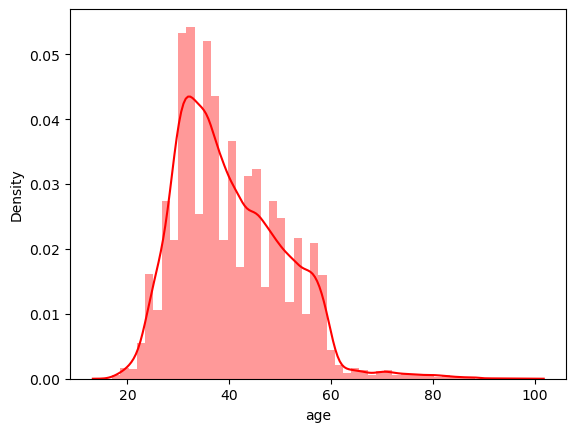

 mean................2.6356297232467565
median....2.0 



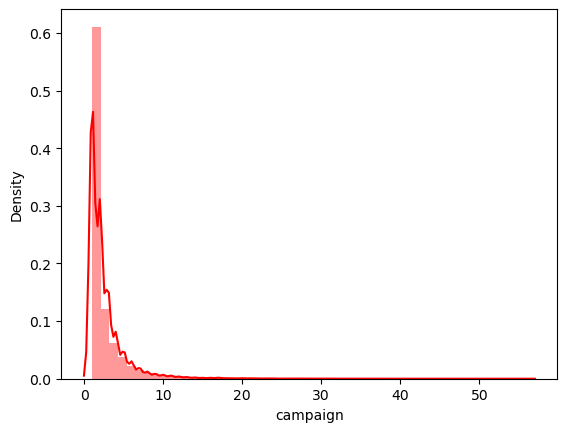

 mean................960.2241881818885
median....999.0 



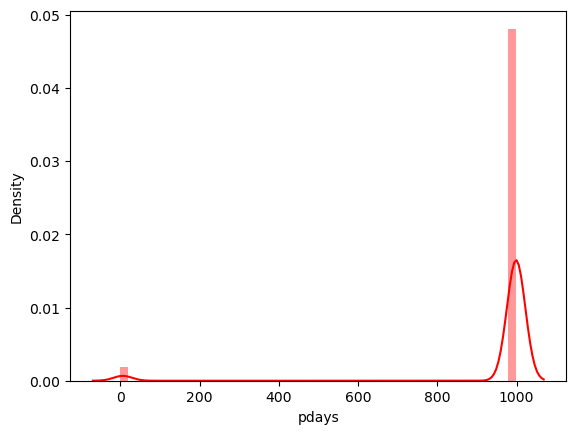

 mean................0.18137267545330274
median....0.0 



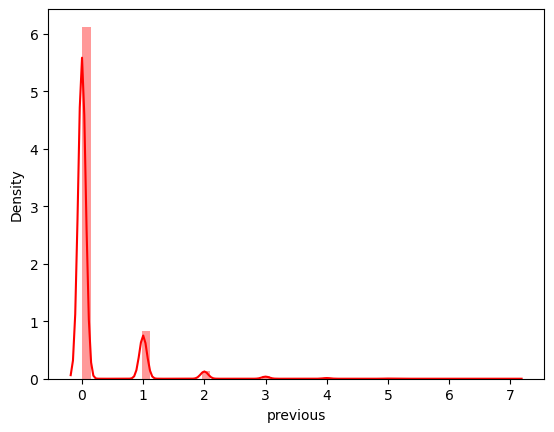

 mean................0.9609501947331769
median....1.0 



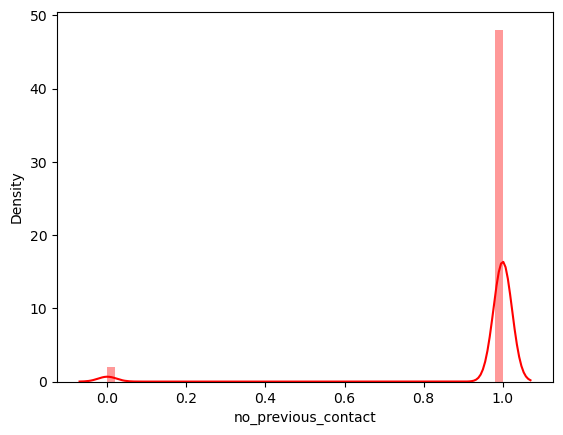

 mean................0.09068633772665137
median....0.0 



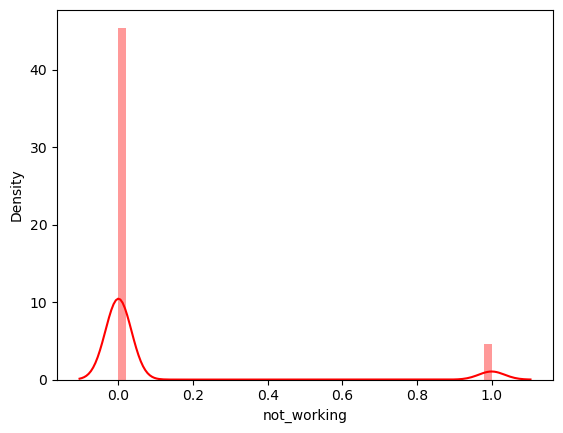

 mean................0.24851048464058187
median....0.0 



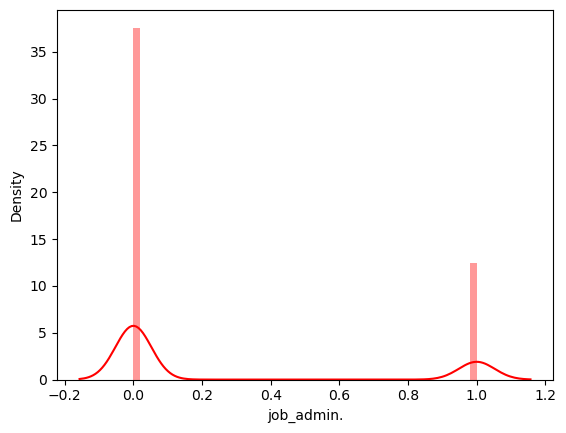

 mean................0.2235949549921333
median....0.0 



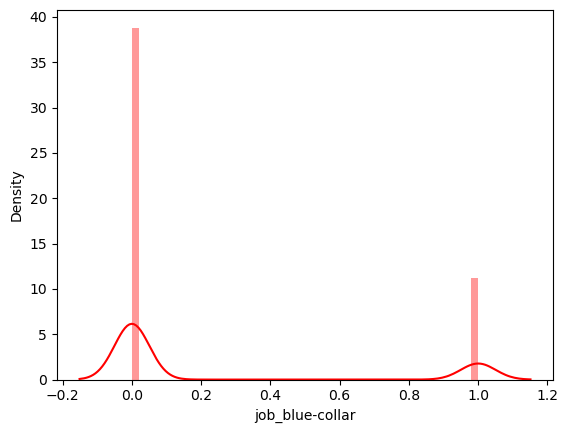

 mean................0.03618684067988961
median....0.0 



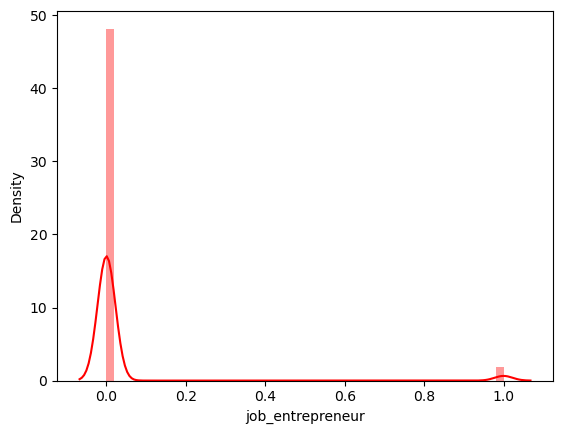

 mean................0.02635990817879343
median....0.0 



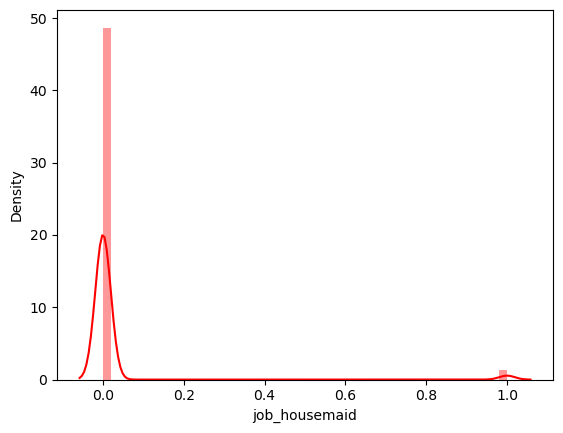

 mean................0.0721415490959738
median....0.0 



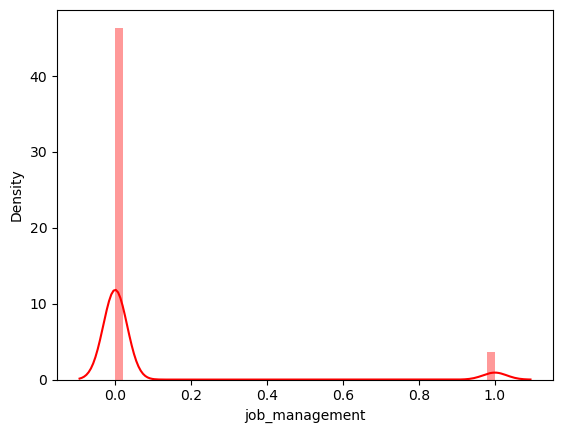

 mean................0.043279770962833045
median....0.0 



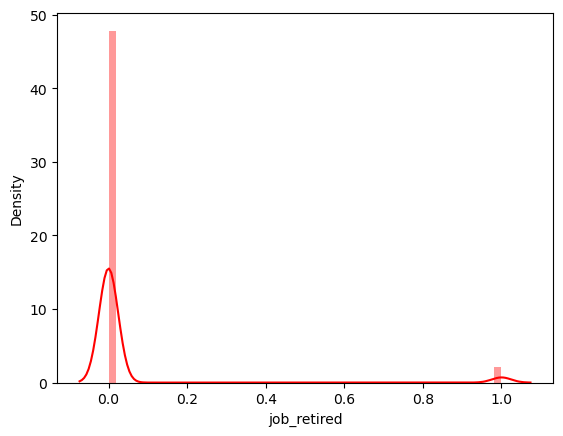

 mean................0.03559361378349798
median....0.0 



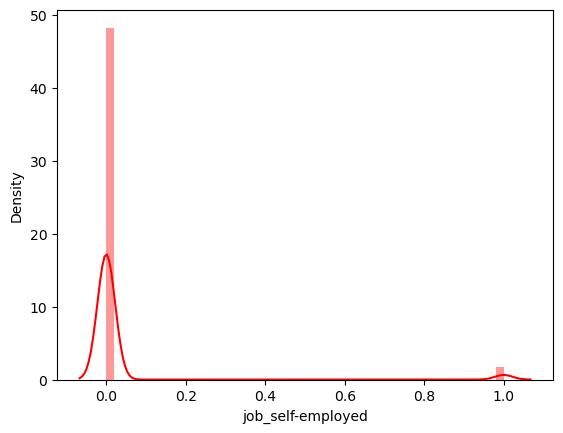

 mean................0.09677336153310465
median....0.0 



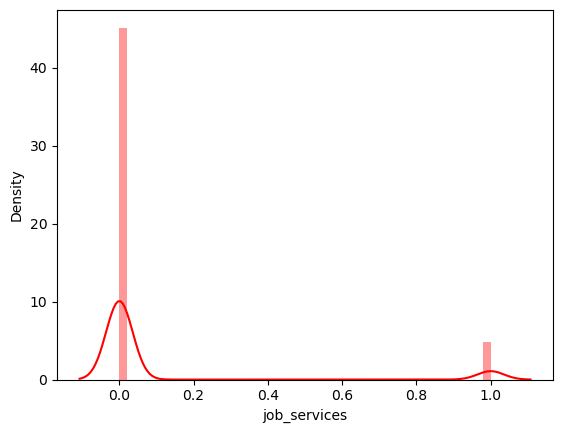

 mean................0.021872017745221944
median....0.0 



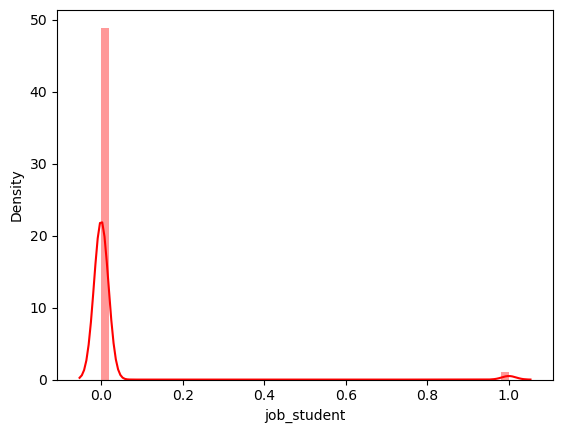

 mean................0.16179618787237884
median....0.0 



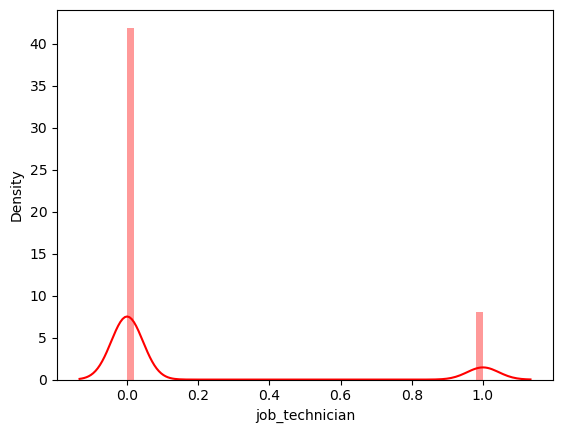

 mean................0.025534549018596375
median....0.0 



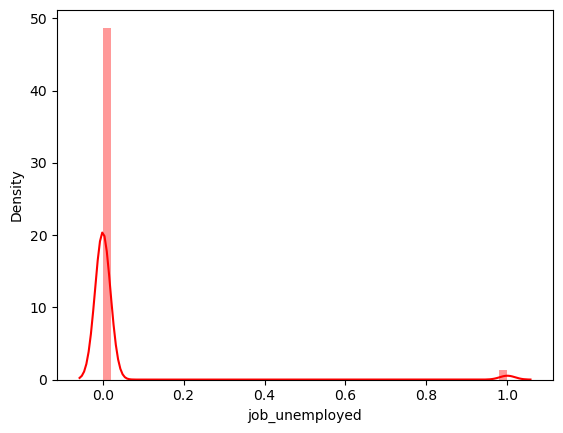

 mean................0.008356761496995177
median....0.0 



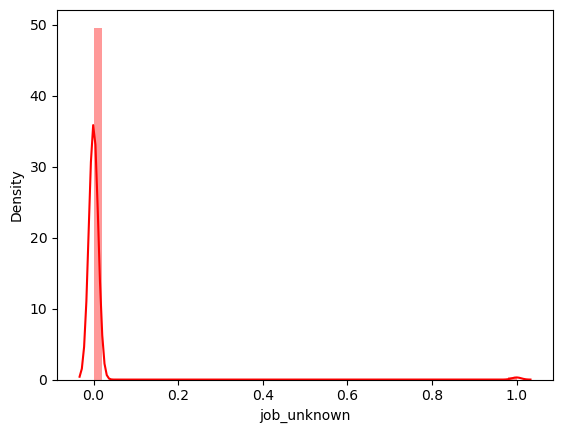

 mean................0.11441541358231667
median....0.0 



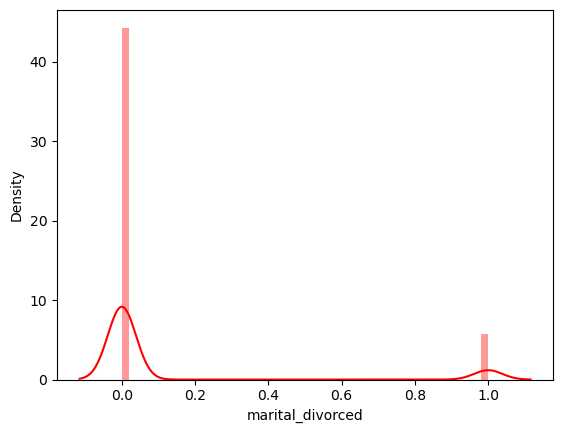

 mean................0.6050140568981971
median....1.0 



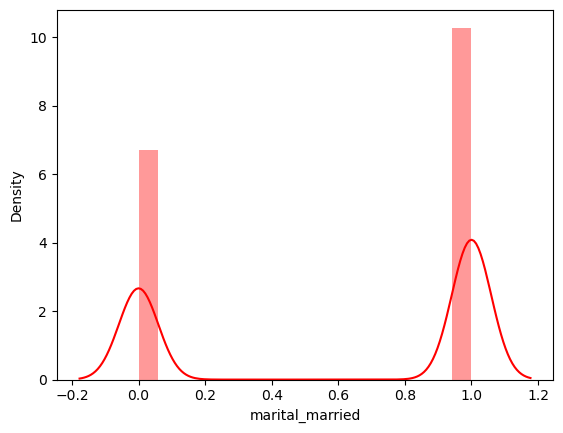

 mean................0.2785329240927497
median....0.0 



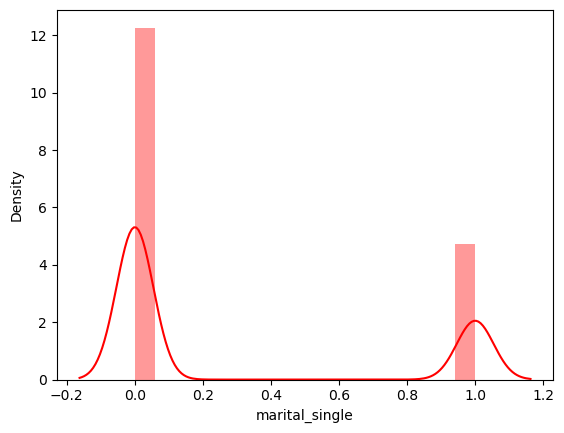

 mean................0.0020376054267364782
median....0.0 



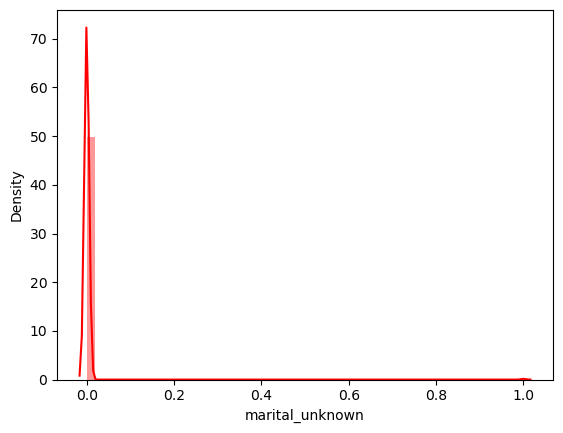

 mean................0.1018286863893116
median....0.0 



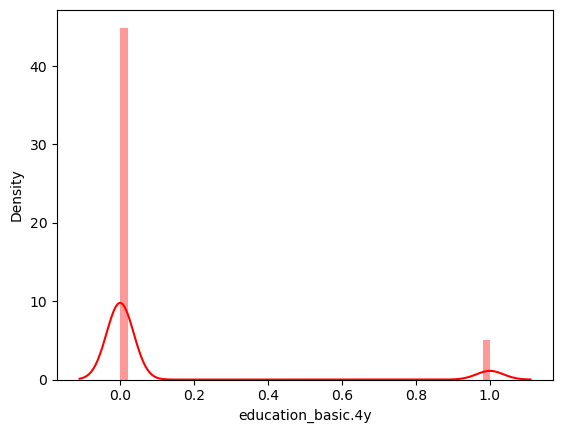

 mean................0.05669185731603518
median....0.0 



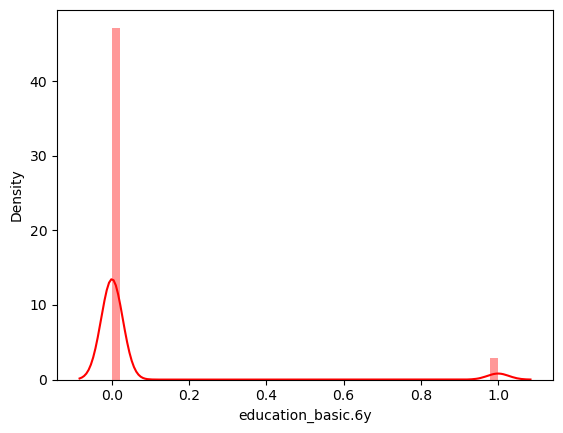

 mean................0.14668179825127028
median....0.0 



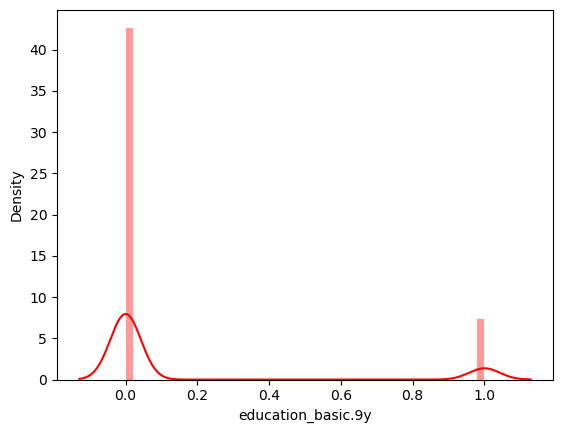

 mean................0.23231281112171467
median....0.0 



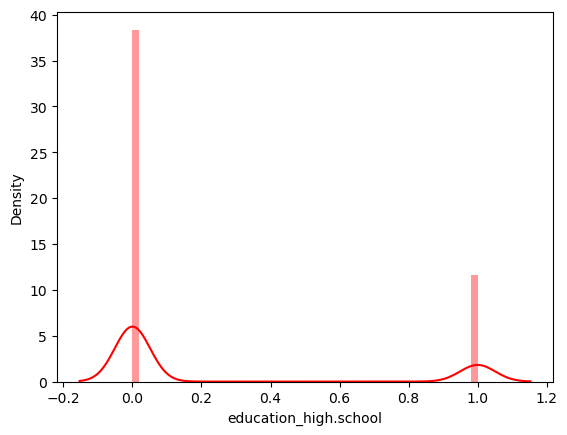

 mean................0.00046426452761084313
median....0.0 



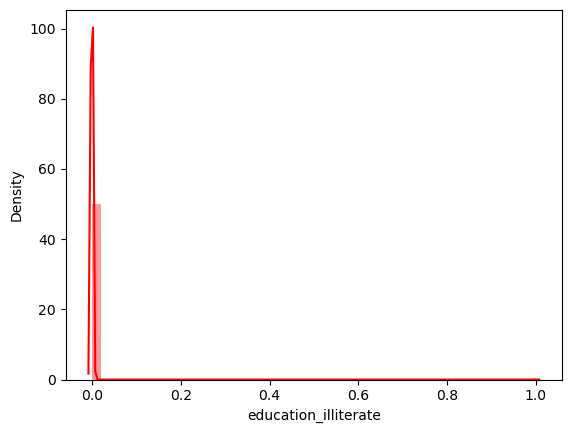

 mean................0.12689897088029714
median....0.0 



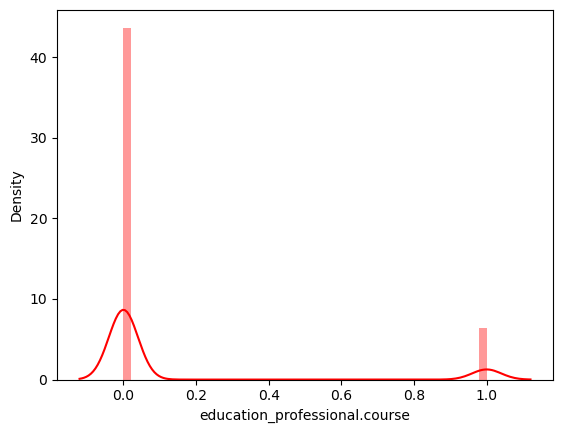

 mean................0.2917386706559026
median....0.0 



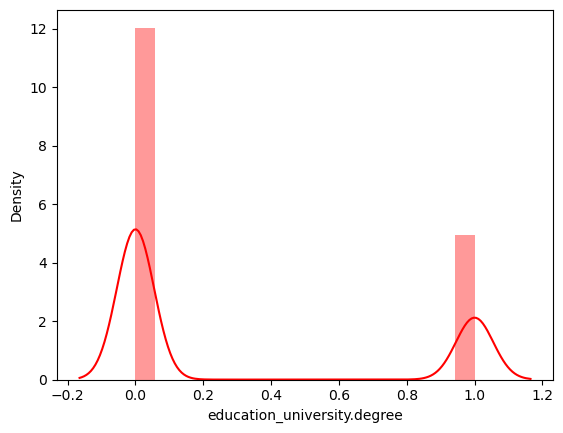

 mean................0.043382940857857676
median....0.0 



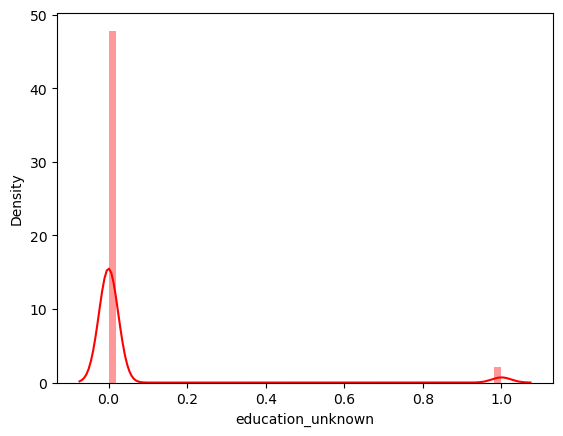

 mean................0.7889917722008718
median....1.0 



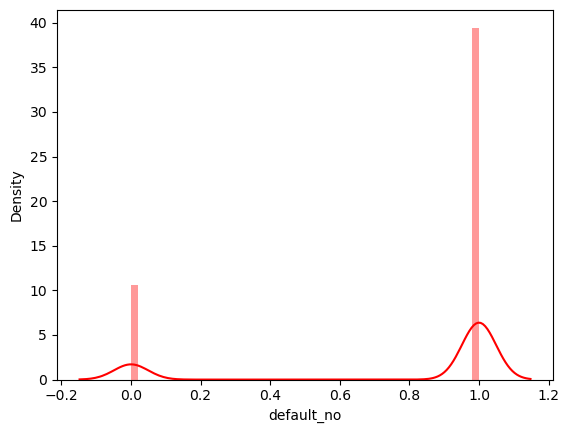

 mean................0.21093085037785975
median....0.0 



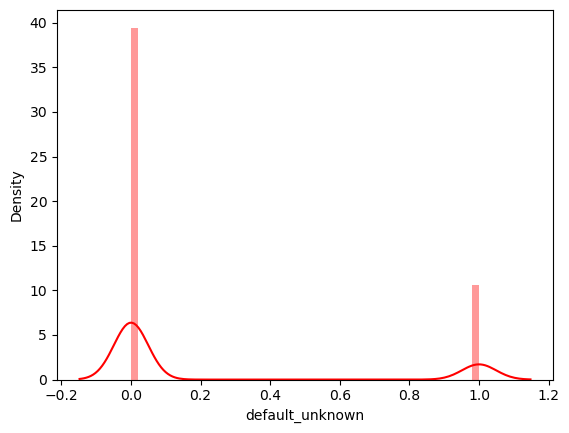

 mean................7.737742126847385e-05
median....0.0 



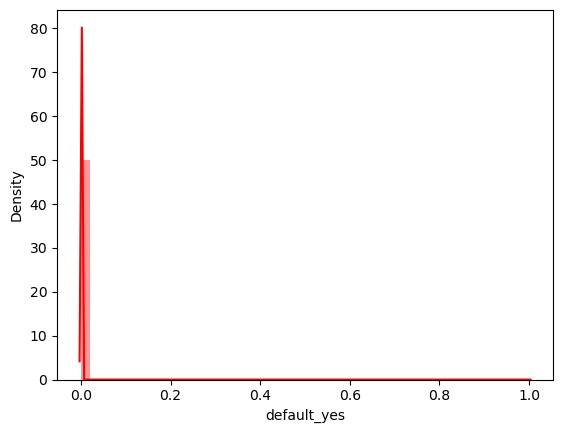

 mean................0.4528384617368652
median....0.0 



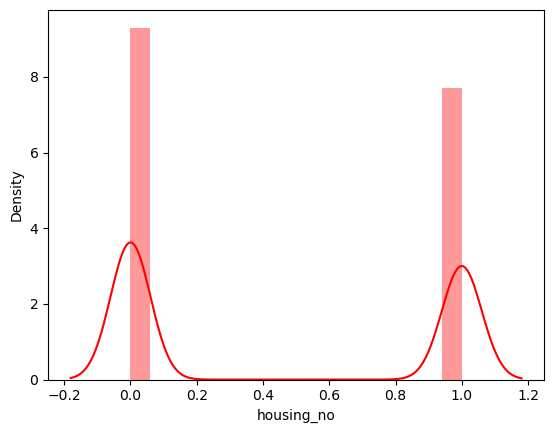

 mean................0.025250831807278638
median....0.0 



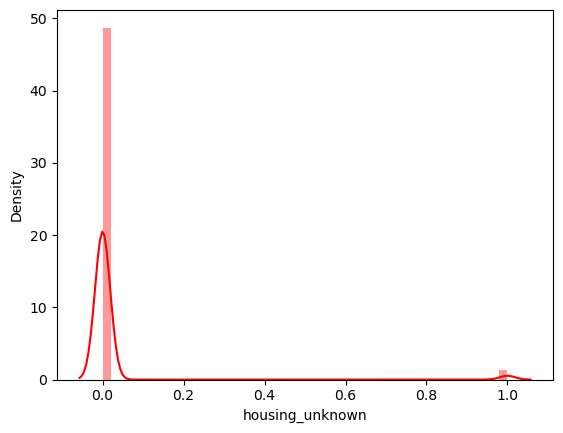

 mean................0.5219107064558561
median....1.0 



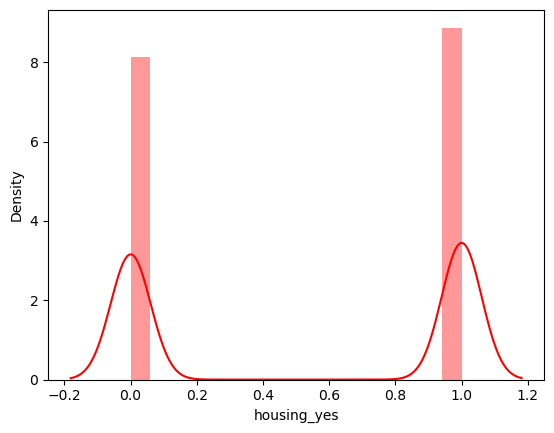

 mean................0.8160222846973253
median....1.0 



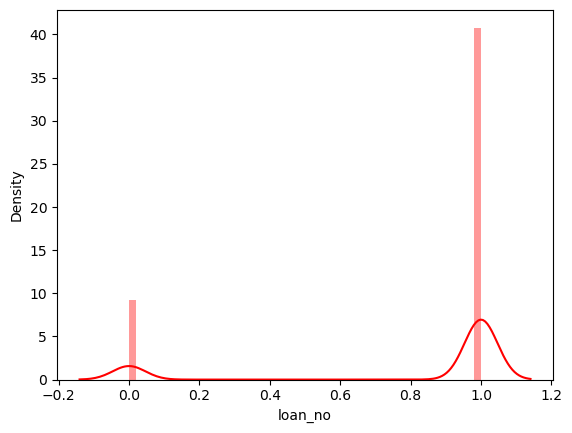

 mean................0.025250831807278638
median....0.0 



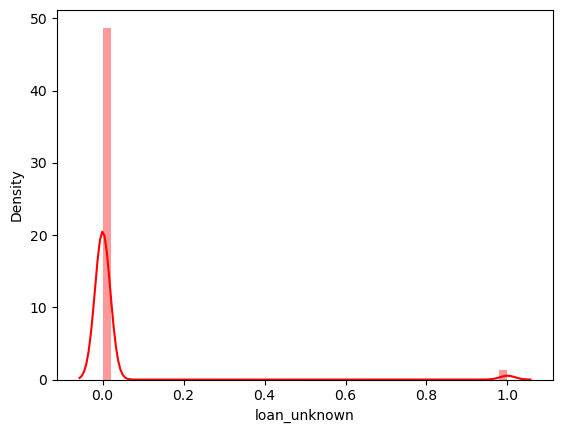

 mean................0.15872688349539604
median....0.0 



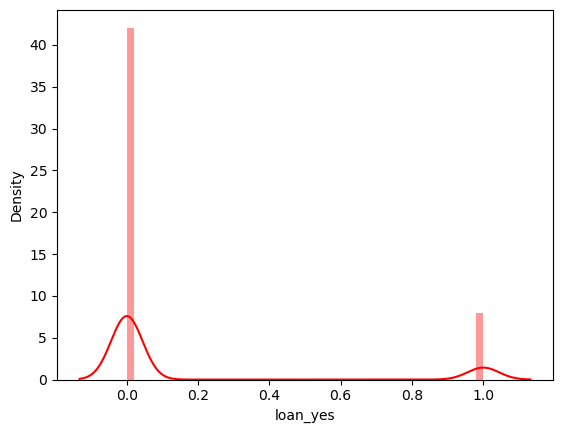

 mean................0.6276340563823476
median....1.0 



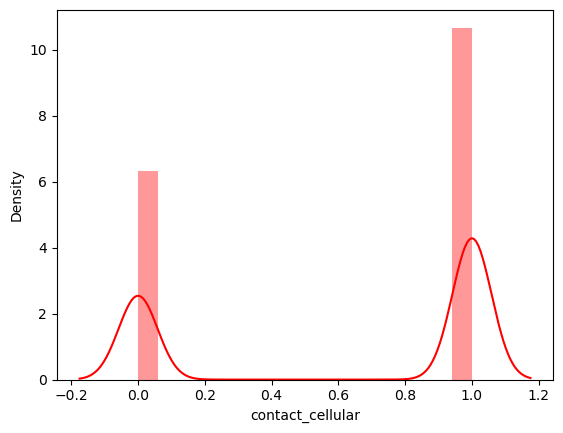

 mean................0.37236594361765235
median....0.0 



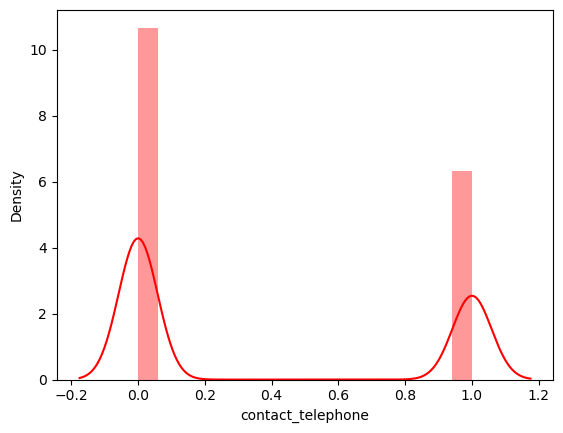

 mean................0.06515178870805499
median....0.0 



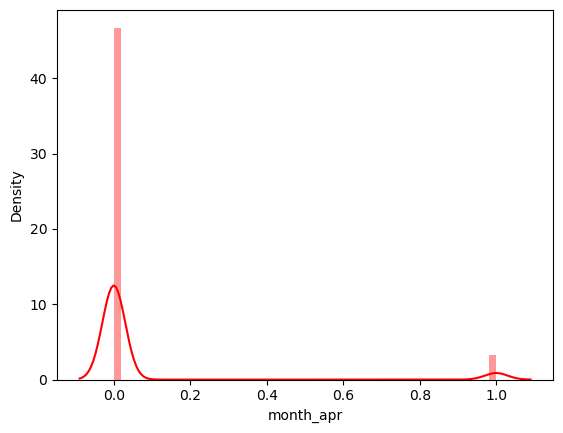

 mean................0.14258079492404116
median....0.0 



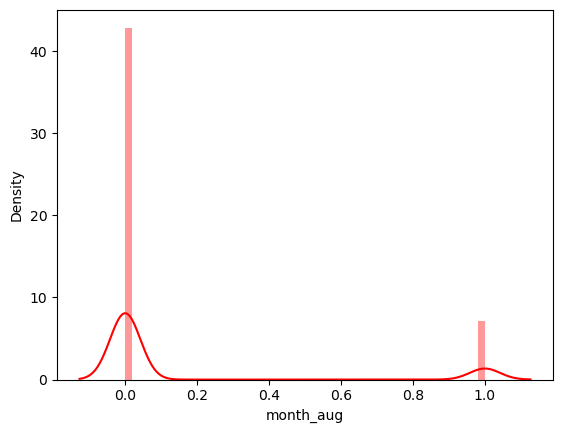

 mean................0.00466843774986459
median....0.0 



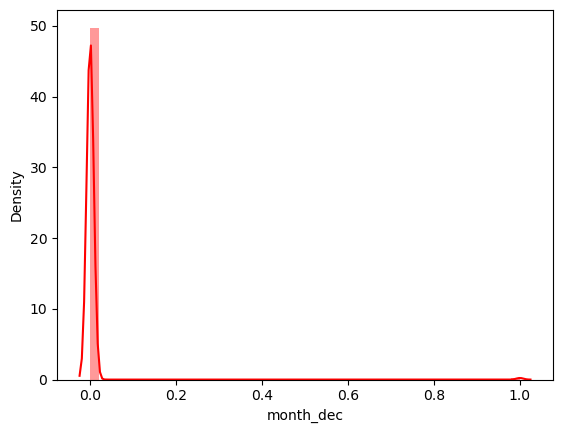

 mean................0.1709009311083026
median....0.0 



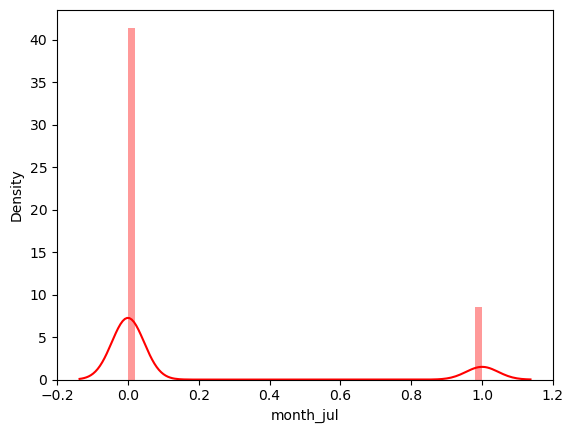

 mean................0.13314074952928737
median....0.0 



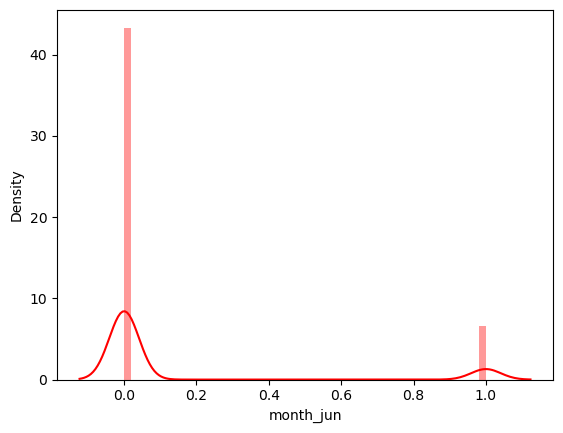

 mean................0.0136184261432514
median....0.0 



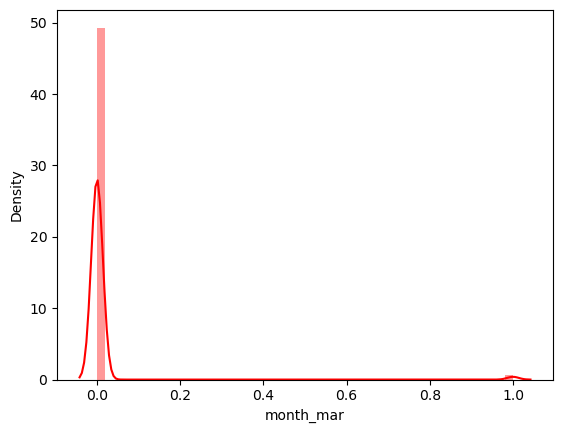

 mean................0.3365917825178613
median....0.0 



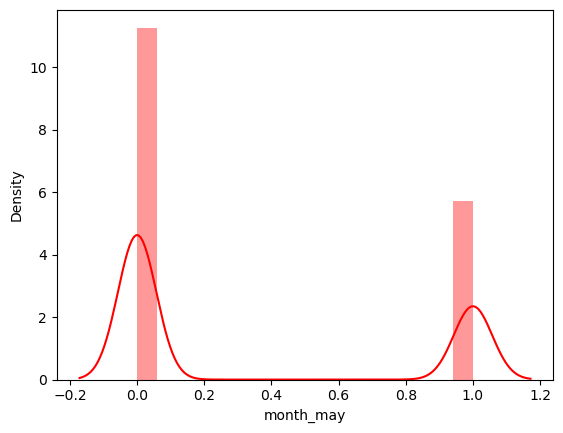

 mean................0.10059064764901601
median....0.0 



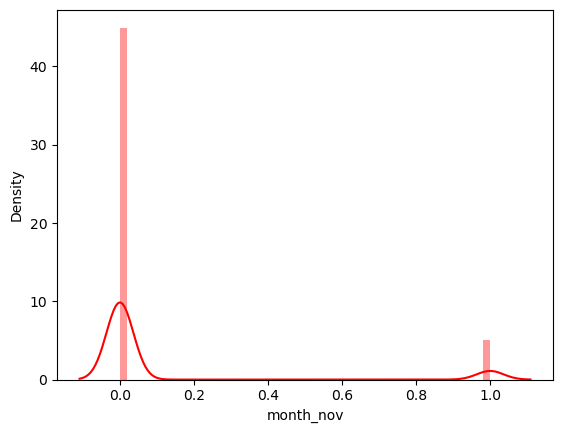

 mean................0.018209486471847516
median....0.0 



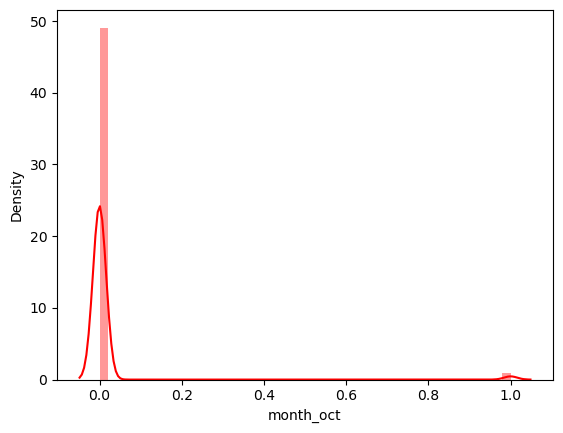

 mean................0.014546955198473085
median....0.0 



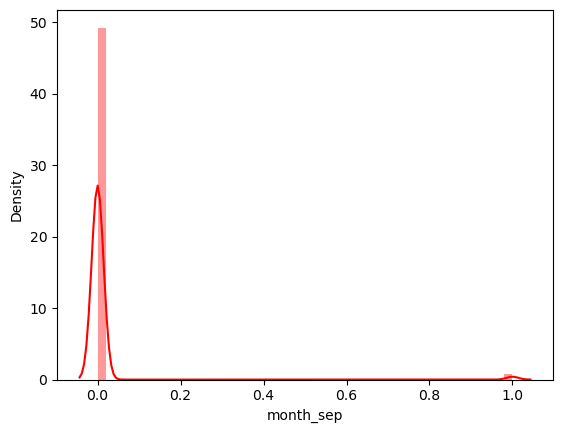

 mean................0.19163808000825358
median....0.0 



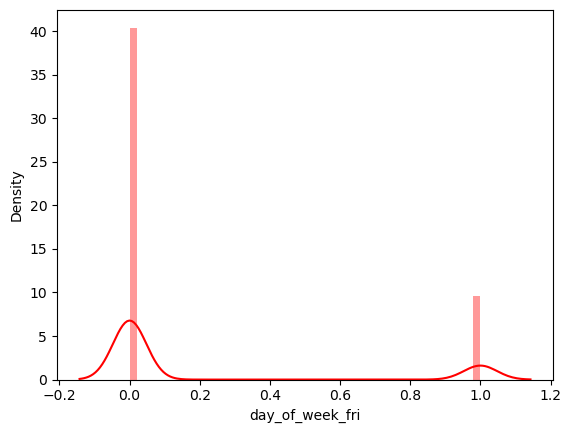

 mean................0.2091253772149287
median....0.0 



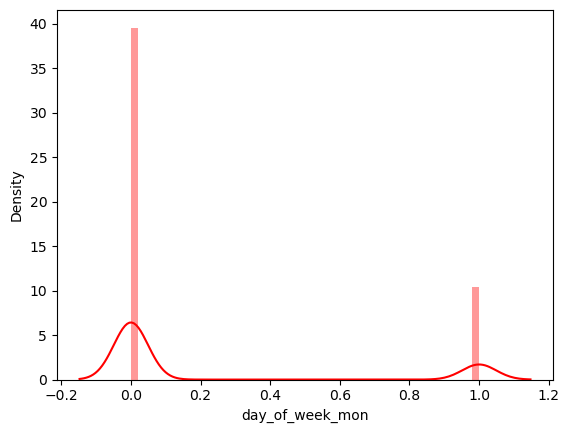

 mean................0.20778416857960846
median....0.0 



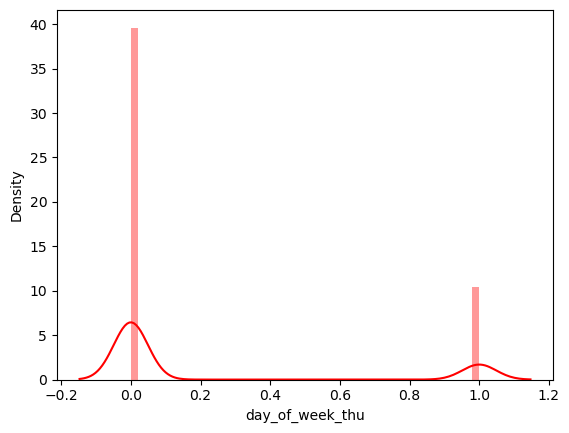

 mean................0.1952490263341157
median....0.0 



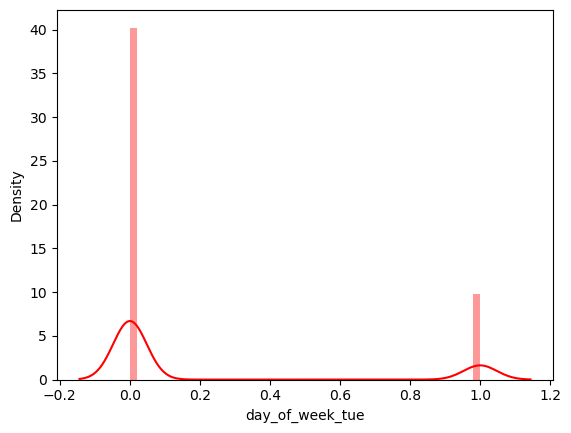

 mean................0.19620334786309354
median....0.0 



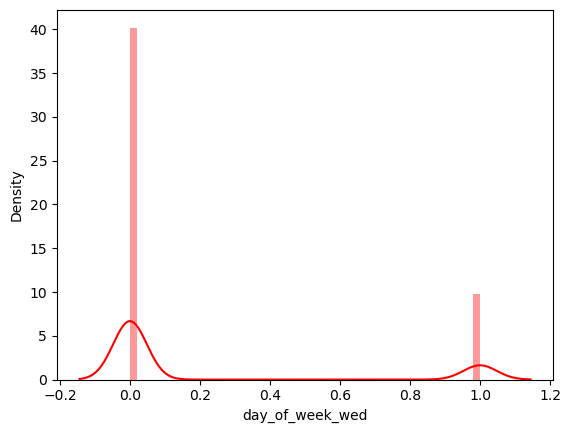

 mean................0.10737406824688556
median....0.0 



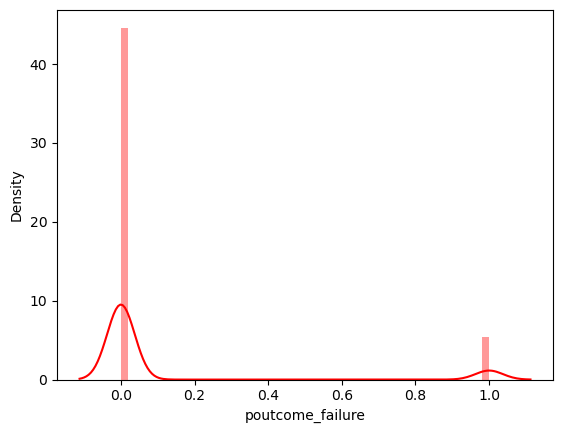

 mean................0.8572386577596657
median....1.0 



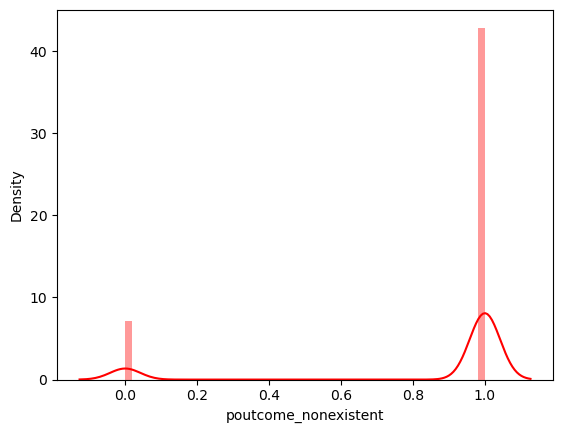

 mean................0.03538727399344871
median....0.0 



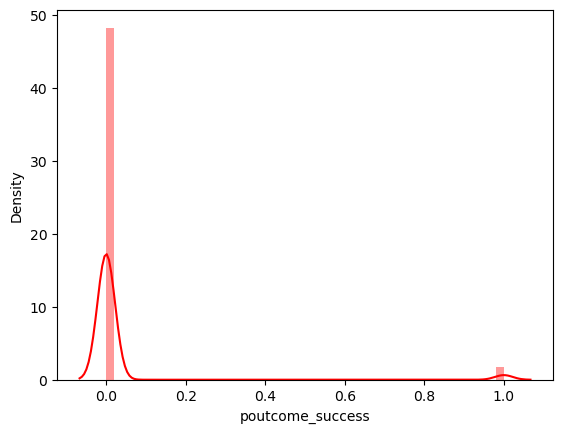

 mean................0.11843903948827732
median....0.0 



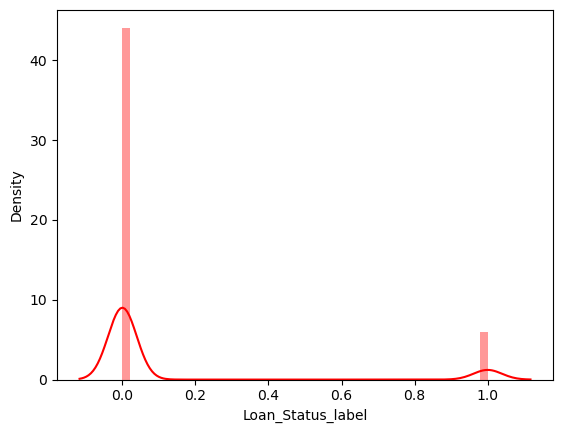

In [23]:
for i in df.columns:
    print(f' mean................{df[i].mean()}')
    print(f'median....{df[i].median()} \n')
    sns.distplot(df[i], color='r')
    plt.show()

In [27]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,...,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000,38771.000000
mean,40.171107,2.635630,960.224188,0.181373,0.960950,0.090686,0.248510,0.223595,0.036187,0.026360,...,0.014547,0.191638,0.209125,0.207784,0.195249,0.196203,0.107374,0.857239,0.035387,0.118439
std,10.492319,2.832271,192.358267,0.506562,0.193716,0.287166,0.432155,0.416659,0.186757,0.160205,...,0.119732,0.393595,0.406689,0.405727,0.396397,0.397129,0.309592,0.349834,0.184759,0.323131
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.000000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(f' IQR: \n \n {IQR}')

 IQR: 
 
 age                              15.0
campaign                          2.0
pdays                             0.0
previous                          0.0
no_previous_contact               0.0
not_working                       0.0
job_admin.                        0.0
job_blue-collar                   0.0
job_entrepreneur                  0.0
job_housemaid                     0.0
job_management                    0.0
job_retired                       0.0
job_self-employed                 0.0
job_services                      0.0
job_student                       0.0
job_technician                    0.0
job_unemployed                    0.0
job_unknown                       0.0
marital_divorced                  0.0
marital_married                   1.0
marital_single                    1.0
marital_unknown                   0.0
education_basic.4y                0.0
education_basic.6y                0.0
education_basic.9y                0.0
education_high.school             0.0
ed

In [29]:
lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print(f'...lower bound for outliers: \n\n{lower_bound}..........\n\n')
print(f'...upper bound for outliers: \n\n{upper_bound}..........\n\n')

...lower bound for outliers: 

age                                9.5
campaign                          -2.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                         0.0
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                   -1.5
marital_single                    -1.5
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y               

In [30]:
df[((df< lower_bound) | (df> upper_bound)).any(axis=1)]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [31]:
df[((df< lower_bound) | (df> upper_bound)).any(axis=1)]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [32]:
df.shape

(38771, 60)

In [33]:
df[~((df< lower_bound) | (df> upper_bound)).any(axis=1)]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label


this is sensitive data we cant remove outliers ............
so we direct use selection model ML

model_building

In [34]:
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


separate your independent and dependent data

In [35]:
x=df.drop(columns=['Loan_Status_label'])
y=df['Loan_Status_label']

In [36]:
x

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [37]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 38771, dtype: int64

split your data into train and test

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

In [39]:
x_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
34767,38,9,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
32132,36,1,999,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9868,49,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
20192,36,9,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
28805,50,2,999,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,35,2,999,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
11843,31,3,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
40568,70,4,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
885,43,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
x_test

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
37815,57,1,999,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5279,53,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
40810,30,1,999,3,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3788,29,2,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
20910,30,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,35,2,999,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
18429,45,1,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
18590,28,2,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4545,33,10,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


feature scaling

In [41]:
from sklearn.preprocessing import StandardScaler


In [42]:
sc=StandardScaler()
x_train_sc= sc.fit_transform(x_train)
x_test_sc= sc.transform(x_test)

In [43]:
x_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
34767,38,9,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
32132,36,1,999,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9868,49,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
20192,36,9,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
28805,50,2,999,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,35,2,999,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
11843,31,3,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
40568,70,4,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
885,43,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [44]:
x_train_sc

array([[-0.21204265,  2.27564026,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       [-0.40249266, -0.58081638,  0.20500869, ...,  2.88584828,
        -2.43949646, -0.19507302],
       [ 0.8354324 , -0.58081638,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       ...,
       [ 2.83515749,  0.49035486,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       [ 0.26408237, -0.58081638,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302],
       [ 0.26408237, -0.2237593 ,  0.20500869, ..., -0.34651856,
         0.40992066, -0.19507302]])

In [45]:
lr=LogisticRegression()
lr.fit(x_train_sc, y_train)

LogisticRegression()

In [46]:
lr.score(x_train_sc, y_train)

0.891346401857106

In [47]:
lr.score(x_test_sc, y_test)

0.8980012894906512

Decision Tree

In [48]:
dtree= DecisionTreeClassifier(max_depth=18)
dtree.fit(x_train_sc , y_train)

DecisionTreeClassifier(max_depth=18)

In [49]:
dtree.score(x_train_sc , y_train)

0.9328088728398246

In [50]:
dtree.score(x_test_sc , y_test)

0.8831721470019342

 KNN Model 

In [51]:
model=KNeighborsClassifier(n_neighbors=6)
model.fit(x_train_sc, y_train)

KNeighborsClassifier(n_neighbors=6)

In [52]:
model.score(x_train_sc, y_train)

0.9002772762445189

In [278]:
model.score(x_test_sc, y_test)

0.8915538362346873

model prediction of logistic regression

In [64]:
y_pred_train= lr.predict(x_train_sc)
y_pred_test= lr.predict(x_test_sc)

In [65]:
x_train[:5]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
34767,38,9,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
32132,36,1,999,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9868,49,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
20192,36,9,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
28805,50,2,999,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [73]:
y_train[:5]

34767    0
32132    0
9868     0
20192    0
28805    1
Name: Loan_Status_label, dtype: int64

In [67]:
y_pred_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

model_evalution

In [75]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [76]:
confusion_matrix(y_train , y_pred_train)

array([[26904,   381],
       [ 2989,   742]], dtype=int64)

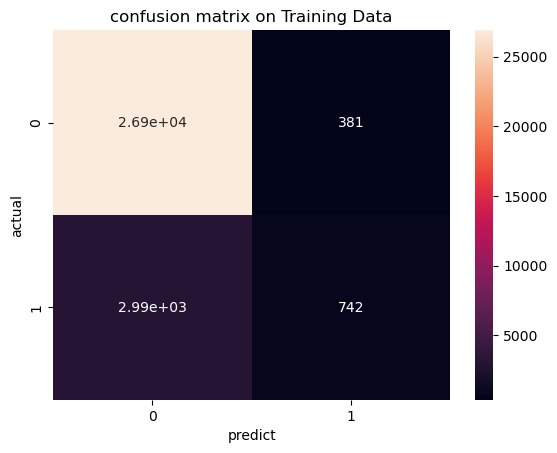

In [77]:
sns.heatmap(confusion_matrix(y_train , y_pred_train), annot= True , fmt='.3g')
plt.title('confusion matrix on Training Data')
plt.xlabel('predict')
plt.ylabel('actual')
plt.show()

In [78]:
accuracy_score(y_train , y_pred_train)

0.891346401857106

In [81]:
print(classification_report(y_train , y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     27285
           1       0.66      0.20      0.31      3731

    accuracy                           0.89     31016
   macro avg       0.78      0.59      0.62     31016
weighted avg       0.87      0.89      0.86     31016



Test

In [85]:
sns.heatmap(confusion_matrix(y_test , y_pred_test), annot= True , fmt='.3g')
plt.title('confusion matrix on test Data')
plt.xlabel('predict')
plt.ylabel('actual')
plt.show()

TypeError: 'tuple' object is not callable

In [86]:
accuracy_score(y_test , y_pred_test)

0.8980012894906512

In [87]:
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6894
           1       0.65      0.18      0.28       861

    accuracy                           0.90      7755
   macro avg       0.78      0.58      0.61      7755
weighted avg       0.88      0.90      0.87      7755



sample data testing

In [97]:
x[:2]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [93]:
y[:3]

0    0
1    0
2    0
Name: Loan_Status_label, dtype: int64

In [94]:
lr.predict(x[:1])

array([0], dtype=int64)

In [95]:
lr.predict(x[:2])

array([0, 0], dtype=int64)

In [96]:
lr.predict(x[:3])

array([0, 0, 0], dtype=int64)

In [110]:
lr.predict([[25 , 1 , 841 , 1 , 0 , 0 , 1, 1, 0 ,0,0 ,0,1,0, 1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0]])

array([0], dtype=int64)